In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./first_project.csv')

In [3]:
df['booking status'] = df['booking status'].replace('Not_Canceled', 'Not Canceled')

# 1. Booking Status Distribution
This gives us a quick overview of the percentage of cancellations versus successful bookings, helping to analyze customer behavior.

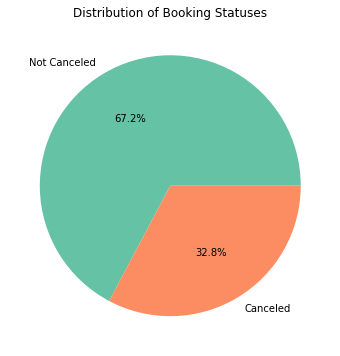

In [4]:
status_counts = df['booking status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Booking Statuses')
plt.show()

# 2. Average Lead Time by Booking Status

This plot helps to understand if there's a difference in the lead time for bookings that were canceled vs. not canceled.

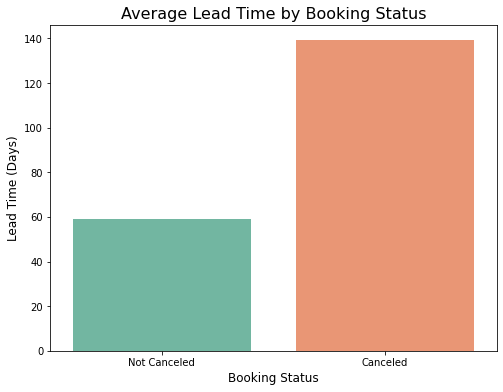

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='booking status', y='lead time', data=df,  hue='booking status', palette='Set2', errorbar=None)

plt.title('Average Lead Time by Booking Status', fontsize=16)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Lead Time (Days)', fontsize=12)
plt.show()

# 3. Impact of Special Requests on Booking Cancellations¶
Assess if customers making more special requests are more or less likely to cancel their bookings.

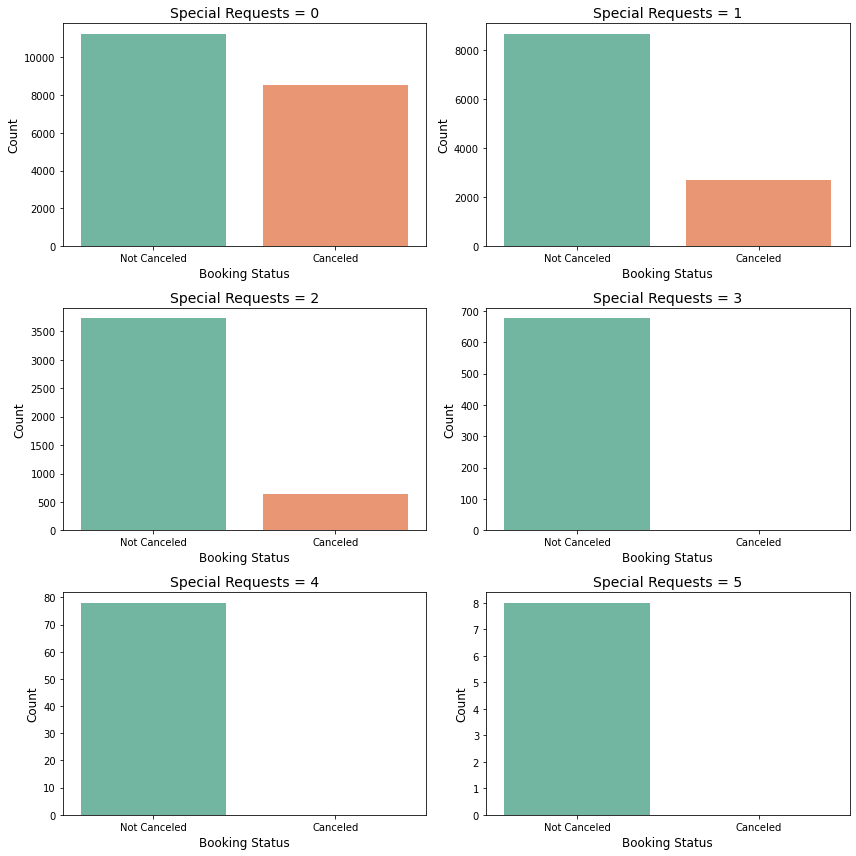

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
set2_palette = sns.color_palette('Set2')

#ensuring color and order consistency
palette = {
    'Not Canceled': set2_palette[0],  # The first color in Set2
    'Canceled': set2_palette[1]       # The second color in Set2
}
order = ['Not Canceled', 'Canceled']

# Loop through the number of special requests from 0 to 5
for i, special_request_value in enumerate(range(6)):
    data_filtered = df[df['special requests'] == special_request_value]
    sns.countplot(x='booking status', data=data_filtered, hue='booking status', palette=palette, order=order, ax=axes[i])
    
    axes[i].set_title(f'Special Requests = {special_request_value}', fontsize=14)
    axes[i].set_xlabel('Booking Status', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Room Type Popularity by Market Segment
Analyze which room types are most popular for different market segments to uncover customer preferences and targeting strategies.

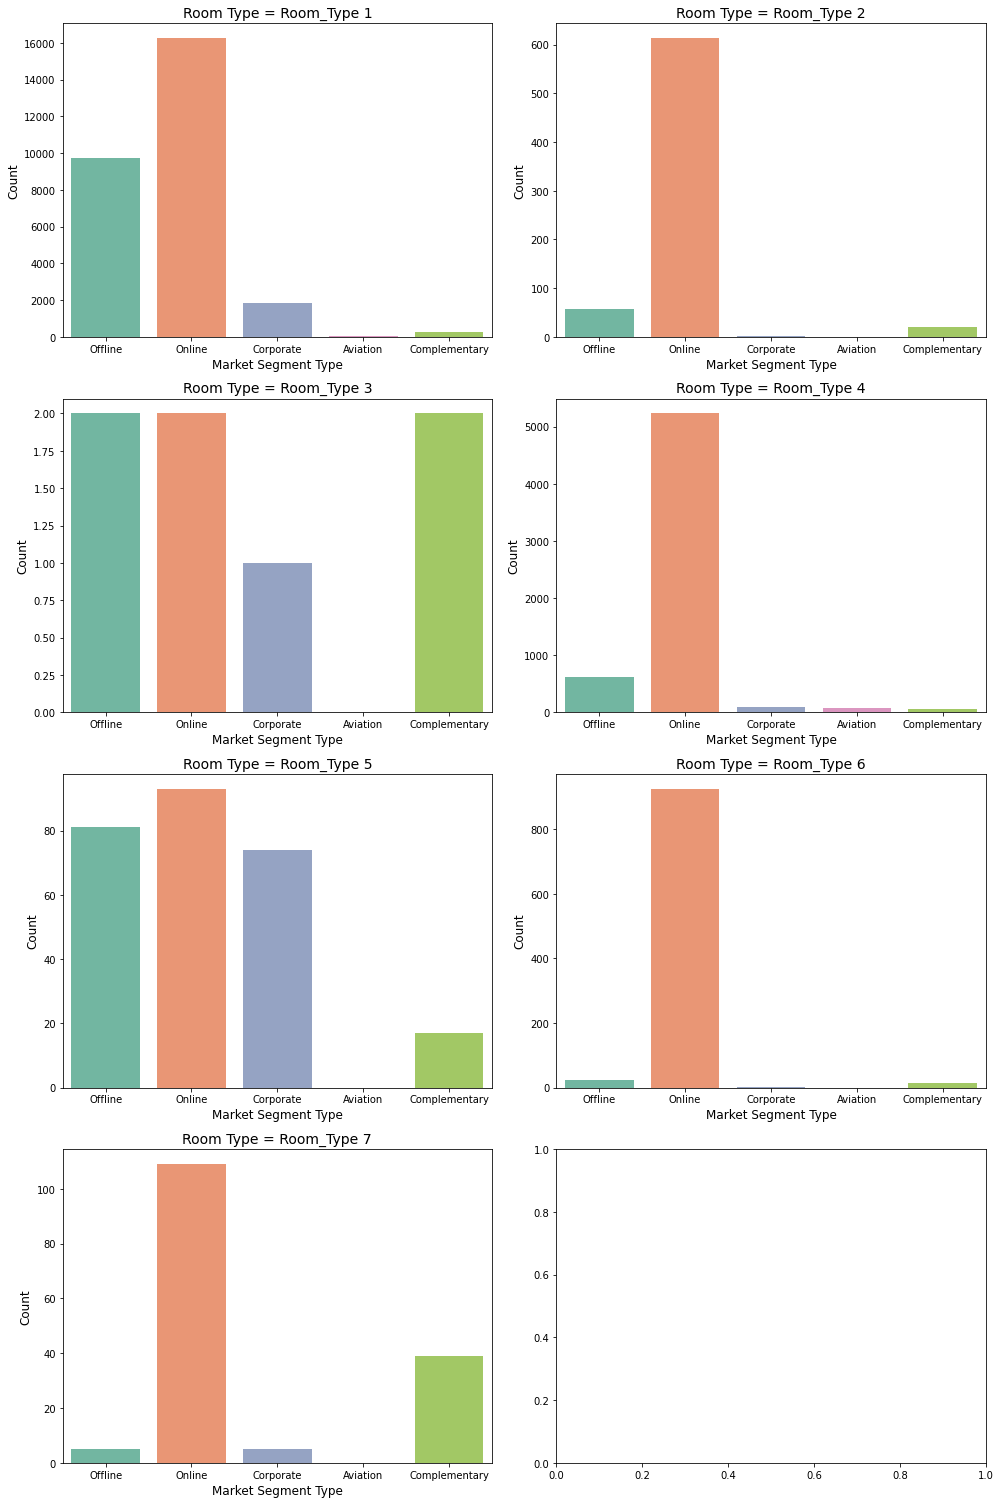

In [8]:
unique_room_types = sorted(df['room type'].unique())
fig, axes = plt.subplots(nrows=len(unique_room_types)//2 + 1, ncols=2, figsize=(14, len(unique_room_types)*3))
axes = axes.flatten()
set2_palette = sns.color_palette('Set2')
order = ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
palette={}
for index in range(len(order)):
    palette[order[index]] = set2_palette[index]
# Loop through the unique room types and create subplots
for i, room_type_value in enumerate(unique_room_types):
    data_filtered = df[df['room type'] == room_type_value]
    
    # Plot for each room type value
    sns.countplot(x='market segment type', data=data_filtered, hue='market segment type', palette=palette, order=order, ax=axes[i])
    axes[i].set_title(f'Room Type = {room_type_value}', fontsize=14)
    axes[i].set_xlabel('Market Segment Type', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()

plt.show()

# 5.Average Price vs. Room Type
Explore the pricing strategy of different room types and how they may influence customer choices

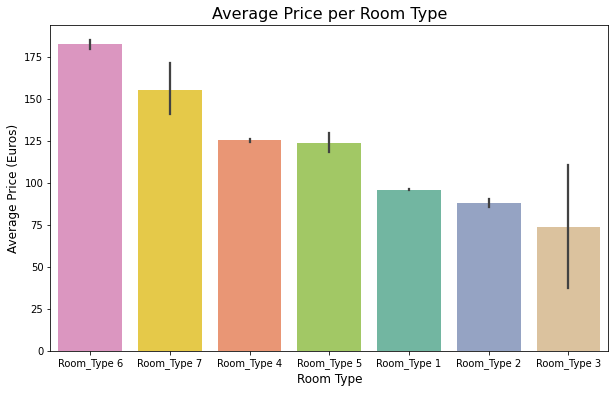

In [9]:
average_prices = df.groupby('room type')['average price '].mean().reset_index()

# Sort the room types by average price in descending order
sorted_room_types = average_prices.sort_values(by='average price ', ascending=False)['room type']

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='room type', 
    y='average price ', 
    data=df, 
    hue='room type', 
    palette='Set2',
    order=sorted_room_types
)
plt.title('Average Price per Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price (Euros)', fontsize=12)
plt.show()

# 6. Weekend vs. Weekday Stays by Market Segment
See if certain market segments prefer weekend stays or weekday stays and adjust marketing strategies accordingly.

<Figure size 720x432 with 0 Axes>

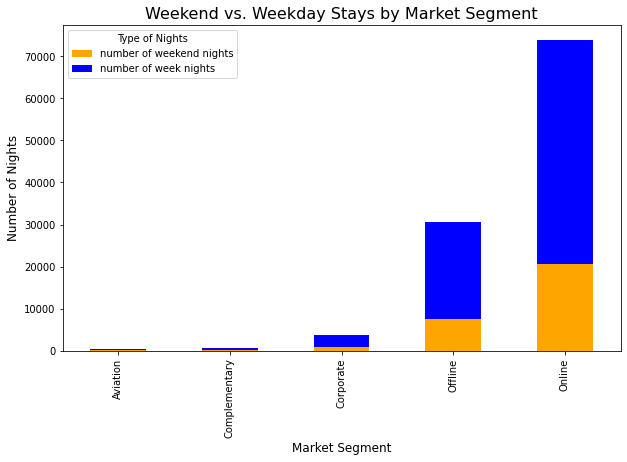

In [10]:
market_segment_data = df.groupby('market segment type')[['number of weekend nights', 'number of week nights']].sum()

plt.figure(figsize=(10, 6))

# Plot stacked bars
market_segment_data.plot(kind='bar', stacked=True, color=['orange', 'blue'], figsize=(10, 6))

plt.title('Weekend vs. Weekday Stays by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Number of Nights', fontsize=12)
plt.legend(title='Type of Nights')

plt.show()

# 7. Car Parking Space Requirement by Market Segment
Identify if there’s a trend among market segments regarding the need for car parking spaces, which could be useful for operational planning.

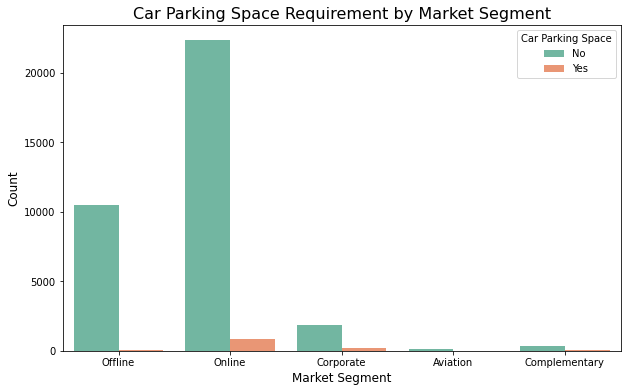

In [11]:
plt.figure(figsize=(10, 6))
order = ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
ax = sns.countplot(x='market segment type', hue='car parking space', data=df, palette='Set2', order=order)
plt.title('Car Parking Space Requirement by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Yes']  # Customize the labels as needed
ax.legend(handles, new_labels, title='Car Parking Space')

plt.show()

# 8.Number of Adults and Children by Booking Status
Check if larger groups (families or multiple adults) tend to cancel more or less frequently than smaller groups

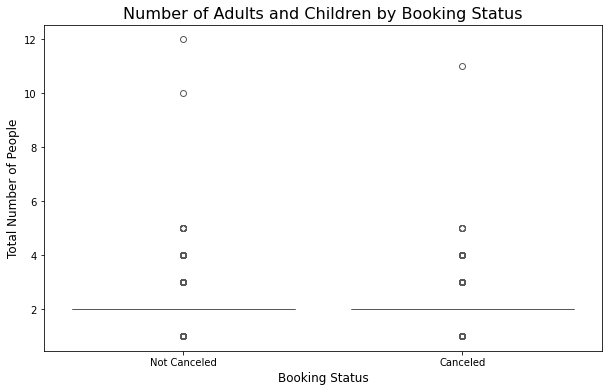

In [12]:
df['total_people'] = df['number of adults'] + df['number of children']

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking status', y='total_people', data=df, hue='booking status', palette='Set2')

plt.title('Number of Adults and Children by Booking Status', fontsize=16)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Total Number of People', fontsize=12)

plt.show()

# 9.Lead Time and Special Requests by Room Type
This could show which room types attract more special requests and longer lead times, offering insights for inventory management and pricing strategies.

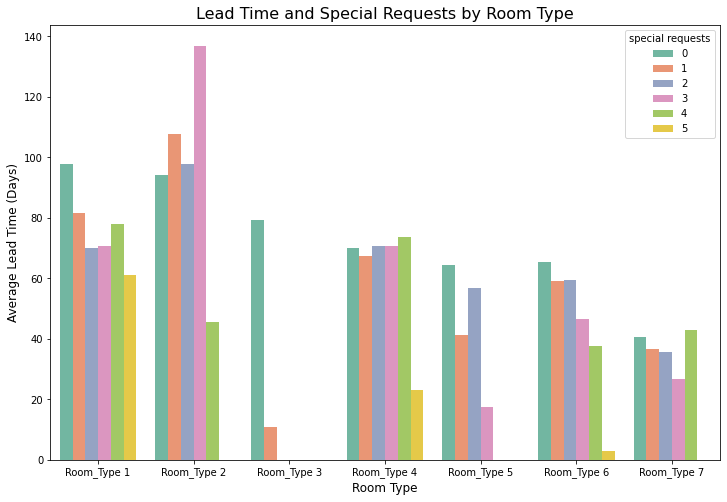

In [13]:
df_grouped = df.groupby(['room type', 'special requests']).agg({'lead time': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='room type', y='lead time', hue='special requests', data=df_grouped, palette='Set2')

plt.title('Lead Time and Special Requests by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Lead Time (Days)', fontsize=12)

plt.show()

# 10. Relationship Between Previous Cancellations and Current Cancellations
Understand whether customers with a history of cancellations are more likely to cancel again.

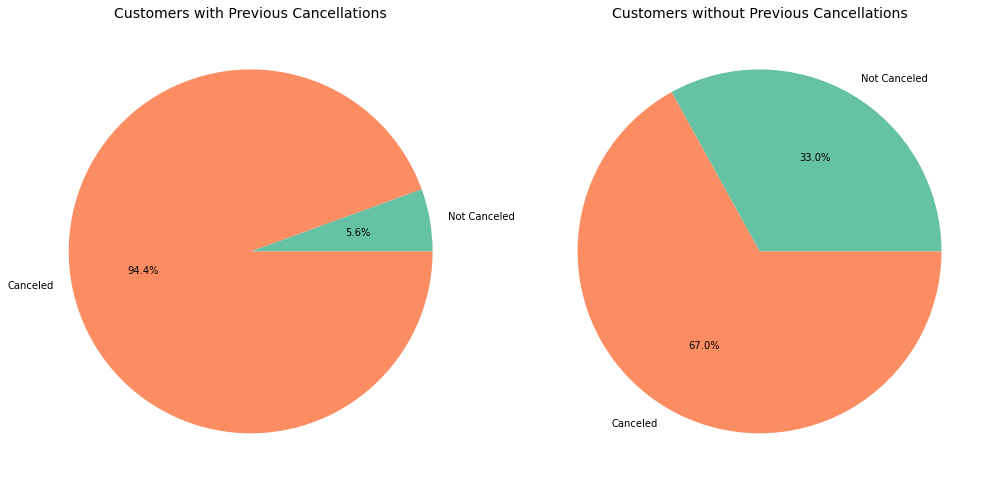

In [14]:
grouped_data = df.groupby('P-C')['booking status'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pie chart for customers with previous cancellations (P-C > 0)
axes[0].pie(grouped_data.loc[1], labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
axes[0].set_title('Customers with Previous Cancellations', fontsize=14)

# Plot pie chart for customers without previous cancellations (P-C = 0)
axes[1].pie(grouped_data.loc[0], labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
axes[1].set_title('Customers without Previous Cancellations', fontsize=14)


plt.tight_layout()
plt.show()